TODO: make a difference map between npipe lens and npipe-lens with dx12 smica weights

In [5]:
%%capture
import numpy as np
import pandas as pd
from healpy.sphtfunc import smoothing
import smica
import os
import json

import copy
from astropy.io import fits

import healpy as hp
import component_separation
from component_separation.io import IO
import component_separation.interface as cslib
import component_separation.MSC.MSC.pospace as ps
import component_separation.powspec as pw

from component_separation.cs_util import Config
from component_separation.cs_util import Constants as const
from component_separation.cs_util import Helperfunctions as hpf
from component_separation.cs_util import Planckf, Planckr, Plancks
import matplotlib.pyplot as plt
csu = Config()
io = IO(csu)
import warnings
warnings.filterwarnings('ignore')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

lmax=csu.lmax
nside_out = csu.nside_out
bins = csu.bins
detector = csu.PLANCKMAPFREQ_f
specfilter = csu.specfilter
freqfilter = csu.freqfilter
lmaxbins = int(bins[-1][1])
colors=csu.CB_color_cycle
filename = io.fh.total_filename
bcorr = [
    hp.gauss_beam(val, lmax, pol = True)[:,1]
    for val in [
        0.00930842,
        0.00785398,
        0.00378155,
        0.002807071,
        0.002106031,
        0.00145444,
        0.00140499,
        ]
    ]
beam5 = hp.gauss_beam(0.001454441043324941835, lmax, pol = True)[:,1]

In [39]:
# NP_smicaclmin = io.load_data(io.fh.clmin_smica_path_name)

cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'NPIPE'
cfc['pa']['mskset'] = 'lens'
csuc = Config(cfc)
ioc = IO(csuc) 
tmask, pmask, pmask =  ioc.load_one_mask_forallfreq()
NP_lensclmin = ioc.load_data(ioc.fh.clmin_smica_path_name)
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'NPIPE'
cfc['pa']['mskset'] = 'smica'
csuc = Config(cfc)
ioc = IO(csuc) 
NP_smicaclmin = ioc.load_data(ioc.fh.clmin_smica_path_name)
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'DX12'
cfc['pa']['mskset'] = 'smica'
csuc = Config(cfc)
ioc = IO(csuc) 
DX_smicaclmin = ioc.load_data(ioc.fh.clmin_smica_path_name)
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'DX12'
cfc['pa']['mskset'] = 'lens'
csuc = Config(cfc)
ioc = IO(csuc) 
DX_lensclmin = ioc.load_data(ioc.fh.clmin_smica_path_name)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'lens', 'freqdset': 'NPIPE', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_polynom': 0, 'num_sim': 5, 'binname': 'SMICA_highell_bins', 'overwrite_cache': True, 'split': '', 'nside_out': None, 'splitvariation': 'GHz', 'freqfilter': ['545', '857'], 'specfilter': ['TB', 'EB', 'ET', 'BT', 'BE'], 'nside_desc_map': [1024, 2048]}
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
loading mask ['PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz']
loaded /global/cscratch1/sd/sebibel/smica/smicaclmin_SMICA_highell_bins_0200_C_l_NPIPE_lens_4000_6000_0_0_Full.npy
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'smica', 'freqdset': 'NPIPE', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_poly

In [47]:
%matplotlib widget
EBidx = 0
nbins = 200
# print(NP_smicaclmin.shape)
print(DX_smicaclmin.shape)
# plt.plot(NP_smicaclmin[1], label='NPIPE smica')
mean, err, _ = hpf.std_dev_binned(NP_lensclmin[EBidx], binwidth=nbins, lmax=4000, log=False)
plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=err, label='NPIPE lens', fmt= '.', capsize=5)
mean, err, _ = hpf.std_dev_binned(DX_smicaclmin[EBidx], binwidth=nbins, lmax=4000, log=False)
plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=err, label='DX12 smica', fmt= '.', capsize=5)
# mean, err, _ = hpf.std_dev_binned(smica_C_lmin_sc[EBidx], binwidth=nbins, lmax=4000, log=False)
# plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=err, label='NPIPE data with DX12-smica weights', fmt= '.', capsize=5)
mean, err, _ = hpf.std_dev_binned(propag_smica_C_lmin_sc[EBidx], binwidth=nbins, lmax=4000, log=False)
plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=err, label='NPIPE data with smica-propag weights', fmt= '.', capsize=5)

plt.legend()
# plt.plot(C_lS[0,1,:])
plt.yscale('log')
plt.ylabel('C_l')
if EBidx == 0:
    plt.title('EE')
else:
    plt.title('BB')
plt.xlabel('Multipole')

(2, 4000)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Multipole')

# Variance

In [49]:
ll = np.arange(0,4000,1)
approx_variance_NPDXsmica = 2 * C_lmin_NPlensDXsmica[EBidx,:] * C_lmin_NPlensDXsmica[EBidx,:]/((2*ll+1)*0.67)
approx_variance_NPlens = 2 * NP_lensclmin[EBidx,:] * NP_lensclmin[EBidx,:]/((2*ll+1)*0.67)
approx_variance_NPpropag = 2 * propag_smica_C_lmin_sc[EBidx,:] * propag_smica_C_lmin_sc[EBidx,:]/((2*ll+1)*0.67)

In [51]:
%matplotlib widget
# plt.plot(approx_variance_NPDXsmica)
# plt.plot(approx_variance_NPlens)

# plt.plot(approx_variance_NPlens/approx_variance_NPDXsmica-1, label= 'NPIPE data with NPIPE-lens weights\nover\nNPIPE data with DX12-smica weights')
# plt.plot(approx_variance_NPlens/approx_variance_NPpropag-1, label= 'NPIPE data with NPIPE-lens weights\nover\nNPIPE data with smica-propag weights')
mean, std, _ = hpf.std_dev_binned(approx_variance_NPlens/approx_variance_NPDXsmica-1, lmax=4000, binwidth=100, log=False)
plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=std, fmt='.', capsize=5, label= 'NPIPE data with NPIPE-lens weights\nover\nNPIPE data with DX12-smica weights')
mean, std, _ = hpf.std_dev_binned(approx_variance_NPlens/approx_variance_NPpropag-1, lmax=4000, binwidth=100, log=False)
plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=std, fmt='.', capsize=5, label= 'NPIPE data with NPIPE-lens weights\nover\nNPIPE data with smica-propag weights')

# mean, std, _ = hpf.std_dev_binned(NP_lensclmin[EBidx,:]/smica_C_lmin_sc[EBidx,:]-1, lmax=4000, binwidth=50, log=False)
# plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=std, fmt='.', capsize=5, label= 'NPIPE data with NPIPE-lens weights\nover\nNPIPE data with DX12-smica weights')
# mean, std, _ = hpf.std_dev_binned(NP_lensclmin[EBidx,:]/propag_smica_C_lmin_sc[EBidx,:]-1, lmax=4000, binwidth=50, log=False)
# plt.errorbar((_[1:]+_[:-1])/2, mean, yerr=std, fmt='.', capsize=5, label= 'NPIPE data with NPIPE-lens weights\nover\nNPIPE data with smica-propag weights')


plt.hlines(0,lmax,0, ls='--', color= 'gray')
plt.ylim((-0.5,0.5))
# plt.yscale('log')
plt.xlim((1e1,4e3))
plt.legend()
plt.xlabel('Multipole')
plt.ylabel('Rel. Diff.')
plt.title('Comparing Variance of MV spectra')
# plt.yscale('log')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Comparing Variance of MV spectra')

# Difference map

In [ ]:
cl = np.array(ps.map2cl_spin(qumap=[MV_map_NPlensDXsmica[1]-propag_CMB[1],MV_map_NPlensDXsmica[2]-propag_CMB[2]], spin=2, mask=pmask['100'], lmax=lmax-1,
    lmax_mask=lmax*2))*1e12

In [296]:
%matplotlib widget
plt.plot(savgol_filter(cl[0],201,3))
plt.yscale('log')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# MV map for NPIPE lens with DX12 smica weights
### Build DX12 smica weight

In [66]:
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'DX12'
cfc['pa']['mskset'] = 'smica'
csuc = Config(cfc)
ioc = IO(csuc) 

W_smica_DXsmica = ioc.load_data(ioc.fh.weight_smica_path_name)
W_mv_DXsmica = ioc.load_data(ioc.fh.weight_path_name)
W_total_DXsmica = hpf.interp_smica_mv_weights(W_smica_DXsmica, W_mv_DXsmica, bins, 4001)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'smica', 'freqdset': 'DX12', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_polynom': 0, 'num_sim': 5, 'binname': 'SMICA_highell_bins', 'overwrite_cache': True, 'split': '', 'nside_out': None, 'splitvariation': 'GHz', 'freqfilter': ['545', '857'], 'specfilter': ['TB', 'EB', 'ET', 'BT', 'BE'], 'nside_desc_map': [1024, 2048]}
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
loaded /global/cscratch1/sd/sebibel/smica/SMICAWEIG_K_CMB_SMICA_highell_bins0200_C_l_DX12_smica_4000_6000_0_0_Full.npy
loaded /global/cscratch1/sd/sebibel/weights/DX12/WEIG_K_CMB_0200_C_l_DX12_smica_4000_6000_0_0_Full.npy
(9, 7, 4001)


### Load maps, mask, and MV combine them with above weights

In [16]:
almE = io.load_data('/global/cscratch1/sd/sebibel/misc/almE_Npipe_lens.npy')
almB = io.load_data('/global/cscratch1/sd/sebibel/misc/almB_Npipe_lens.npy')

loaded /global/cscratch1/sd/sebibel/misc/almE_Npipe_lens.npy
loaded /global/cscratch1/sd/sebibel/misc/almB_Npipe_lens.npy


If there is a new fit from for DX12 weights, the combalm need to be recalculated

In [17]:
combalmE_NPlensDXsmica = ioc.load_data("/global/cscratch1/sd/sebibel/misc/combalmE_Npipe_lens_DX12smicaweights.npy")
combalmB_NPlensDXsmica = ioc.load_data("/global/cscratch1/sd/sebibel/misc/combalmB_Npipe_lens_DX12smicaweights.npy")

loaded /global/cscratch1/sd/sebibel/misc/combalmE_Npipe_lens_DX12smicaweights.npy
loaded /global/cscratch1/sd/sebibel/misc/combalmB_Npipe_lens_DX12smicaweights.npy


In [18]:
MV_map_NPlensDXsmica = hp.alm2map([np.zeros_like(combalmE_NPlensDXsmica), np.nan_to_num(combalmE_NPlensDXsmica), np.nan_to_num(combalmB_NPlensDXsmica)], csu.nside_out[1])

In [19]:
ioc.save_data(MV_map_NPlensDXsmica, "/global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_DX12smicaweights.npy")

Data saved to /global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_DX12smicaweights.npy


In [35]:
MV_map_NPlensDXsmica = ioc.load_data("/global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_DX12smicaweights.npy")
C_lmin_NPlensDXsmica = np.array(ps.map2cl_spin(qumap=MV_map_NPlensDXsmica[1:3], spin=2, mask=pmask['100'], lmax=lmax-1,
    lmax_mask=lmax*2))*1e12 #maps are different scale than processed powerspectra from this' package pipeline, thus *1e12

loaded /global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_DX12smicaweights.npy


# MV map for NPIPE lens with smica propagation code weights

In [23]:
W_total_propag = np.loadtxt("/global/homes/s/sebibel/ext/smica_propagation/weights_EB_smica_R3.00.txt").reshape(2,7,4001)

In [24]:
nalm = int((lmax)*(lmax-1+2)/2)  
combalmE = np.zeros((nalm), dtype=np.complex128)
combalmB = np.zeros((nalm), dtype=np.complex128)
Egauss = hp.gauss_beam(np.radians(4.848/60), lmax, pol = True)[:,1]
Bgauss = hp.gauss_beam(np.radians(4.848/60), lmax, pol = True)[:,2]
for it, det in enumerate(csu.PLANCKMAPFREQ): #weights do not depend on freqfilter, but almE/B do
    if det in csu.PLANCKMAPFREQ_f:
        print('freq: ', det)
        ns = csu.nside_out[0] if int(det) < 100 else csu.nside_out[1]
        # combalmT += hp.almxfl(almT[name], np.squeeze(W[0,m,:]))
        combalmE += hp.almxfl(hp.almxfl(almE[det],1/beamfNPIPE[1,it,it][:lmax]), W_total_propag[0,it,:]*bcorr[it]/(beam5))#*np.nan_to_num(beamfDX12[1,it,it])/Egauss)
        combalmE = hp.almxfl(combalmE, 1/hp.pixwin(ns, pol=True)[0][:lmax])
#             combalmE = hp.smoothalm(combalmE, fwhm = np.radians(5/60))
        combalmB += hp.almxfl(hp.almxfl(almB[det],1/beamfNPIPE[2,it,it][:lmax][:lmax]), W_total_propag[1,it,:]*bcorr[it]/(beam5))#*np.nan_to_num(beamfDX12[2,it,it])/Bgauss)
        combalmB = hp.almxfl(combalmB, 1/hp.pixwin(ns, pol=True)[1][:lmax])
#             combalmB = hp.smoothalm(combalmB, fwhm = np.radians(5/60))

propag_CMB = hp.alm2map([np.zeros_like(combalmE), combalmE, combalmB], csu.nside_out[1])
ioc.save_data(propag_CMB, "/global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_smicapropagweights.npy")

freq:  030
freq:  044
freq:  070
freq:  100
freq:  143
freq:  217
freq:  353
Data saved to /global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_smicapropagweights.npy


In [33]:
propag_CMB = ioc.load_data("/global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_smicapropagweights.npy")
propag_smica_C_lmin_sc = np.array(ps.map2cl_spin(qumap=propag_CMB[1:3], spin=2, mask=pmask['100'], lmax=lmax-1,
    lmax_mask=lmax*2))*1e12 #maps are different scale than processed powerspectra from this' package pipeline, thus *1e12

loaded /global/cscratch1/sd/sebibel/misc/MVmap_Npipe_lens_smicapropagweights.npy


# Check Maps

In [3]:
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'NPIPE'
cfc['pa']['mskset'] = 'lens'
csuc = Config(cfc)
ioc = IO(csuc)
mvnpipelens = ioc.load_data(ioc.fh.cmbmap_smica_path_name)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'lens', 'freqdset': 'NPIPE', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_polynom': 0, 'num_sim': 5, 'binname': 'SMICA_highell_bins', 'overwrite_cache': True, 'split': '', 'nside_out': None, 'splitvariation': 'GHz', 'freqfilter': ['545', '857'], 'specfilter': ['TB', 'EB', 'ET', 'BT', 'BE'], 'nside_desc_map': [1024, 2048]}
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
loaded /global/cscratch1/sd/sebibel/smica/smicaminvarmap_SMICA_highell_bins_0200_C_l_NPIPE_lens_4000_6000_0_0_Full.npy


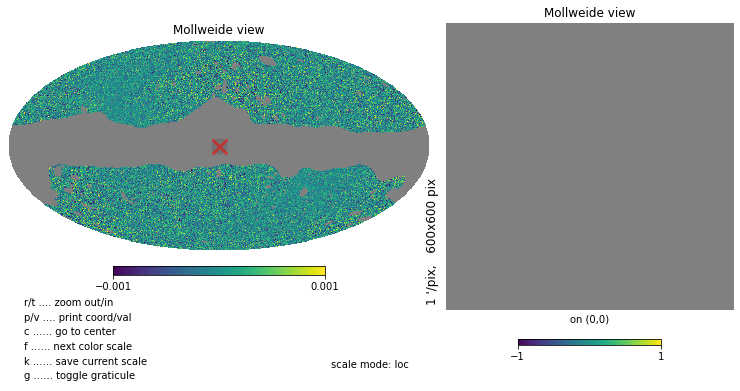

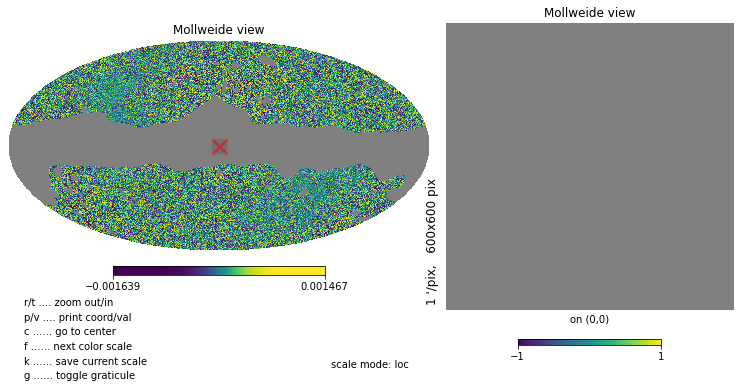

In [15]:
maq = hp.ma(mvnpipelens[1])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq)
maq = hp.ma(mvnpipelens[2])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, norm='hist')

In [288]:
maq = hp.ma(MV_map_NPlensDXsmica[1])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, norm='hist')
maq = hp.ma(MV_map_NPlensDXsmica[2])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, norm='hist')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [241]:
maq = hp.ma(propag_CMB[1])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, norm='hist')
maq = hp.ma(propag_CMB[2])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, norm='hist')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
%matplotlib widget
maq = hp.ma(MV_map_NPlensDXsmica[1]-propag_CMB[1])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, min=-1.8e-3, max=1.8e-3, norm='hist')
maq = hp.ma(MV_map_NPlensDXsmica[2]-propag_CMB[2])
maq.mask = np.logical_not(pmask['100'].astype(np.bool_))
hp.mollzoom(maq, norm='hist')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Check Weights

In [170]:
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'NPIPE'
cfc['pa']['mskset'] = 'lens'
csuc = Config(cfc)
ioc = IO(csuc) 

W_smica_NPlens = ioc.load_data(ioc.fh.weight_smica_path_name)
W_mv_NPlens = ioc.load_data(ioc.fh.weight_path_name)
W_total_NPlens = hpf.interp_smica_mv_weights(W_smica_NPlens, W_mv_NPlens, bins, 4001)

cfc['pa']['freqdset'] = 'DX12'
cfc['pa']['mskset'] = 'smica'
csuc = Config(cfc)
ioc = IO(csuc) 

W_smica_DXsmica = ioc.load_data(ioc.fh.weight_smica_path_name)
W_mv_DXsmica = ioc.load_data(ioc.fh.weight_path_name)
W_total_DXsmica = hpf.interp_smica_mv_weights(W_smica_DXsmica, W_mv_DXsmica, bins, 4001)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'lens', 'freqdset': 'NPIPE', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_polynom': 0, 'num_sim': 5, 'binname': 'SMICA_highell_bins', 'overwrite_cache': True, 'split': '', 'nside_out': None, 'splitvariation': 'GHz', 'freqfilter': ['545', '857'], 'specfilter': ['TB', 'EB', 'ET', 'BT', 'BE'], 'nside_desc_map': [1024, 2048]}
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
loaded /global/cscratch1/sd/sebibel/smica/SMICAWEIG_K_CMB_SMICA_highell_bins0200_C_l_NPIPE_lens_4000_6000_0_0_Full.npy
loaded /global/cscratch1/sd/sebibel/weights/NPIPE/WEIG_K_CMB_0200_C_l_NPIPE_lens_4000_6000_0_0_Full.npy
(9, 7, 4001)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'smica', 'freqdset': 'DX12', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 

In [254]:
%matplotlib widget
W_total_propag = np.loadtxt("/global/homes/s/sebibel/ext/smica_propagation/weights_EB_smica_R3.00.txt").reshape(2,7,4001)
# *bcorr[freq]/(beam5)
lab2='DX12 smica'
plt.plot(0,0,color='black', label= 'NPIPE lens')
conc=[]
lab=[]
# bc1 = np.sum(W_total[1,:,:]-W_total_propag[0,:,:]*np.diagonal(np.nan_to_num(beamf[1,:,:]),axis1=0, axis2=1).T/hp.gauss_beam(0.0014105, lmax, pol = True)[:,1], axis=0)
# bc2 = np.sum(W_total[1,:,:]-W_total_propag[0,:,:]*bcorr[:]/(beam5), axis=0)
# b = np.sum(W_total[1,:,:], axis=0)
# c1 = np.sum(W_total_propag[0,:,:]*bcorr[:]/(beam5), axis=0)
c2 = np.sum(W_total_propag[0,:,:]*np.diagonal(np.nan_to_num(beamfNPIPE[1,:,:]),axis1=0, axis2=1).T/hp.gauss_beam(np.radians(4.845/60), lmax, pol = True)[:,1], axis=0)
c3 = np.sum(W_total_propag[0,:,:]*np.diagonal(np.nan_to_num(beamfDX12[1,:,:]),axis1=0, axis2=1).T/hp.gauss_beam(np.radians(4.848/60), lmax, pol = True)[:,1], axis=0)
# plt.plot(bc1)
# plt.plot(bc2)
# plt.plot(b)
# plt.plot(c1)
# plt.plot(c2, label='NPIPE')
# plt.plot(c3, label='DX12')
Egauss = hp.gauss_beam(np.radians(4.847/60), lmax, pol = True)[:,1]
for freq in range(0,7):
    plt.plot(W_total_NPlens[1,freq,:], color=colors[freq], lw = 2)

    lab2=None
    a, = plt.plot(W_total_DXsmica[1,freq,:], color=colors[freq], ls = '--', lw = 1)

    conc += [a]
    lab += [csu.PLANCKMAPFREQ[freq]]
    
#     plt.plot(W_total_propag[0,freq,:]*np.nan_to_num(beamfDX12[1,freq,freq])/Egauss, color=colors[freq])
    plt.plot(W_total_propag[0,freq,:]*bcorr[freq]/(beam5), color=colors[freq], ls = '--', lw = 1)
l2 = plt.legend(conc, lab, loc=4)
plt.gca().add_artist(l2)


# plt.ylim((-0.2,1))
plt.xlabel('Multipole')
plt.ylabel('Weight')
plt.legend(loc=1)
plt.ylim((-.2,1.02))

# plt.xscale('log')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-0.2, 1.02)

In [196]:
%matplotlib widget
for freq in range(0,7):
#     a = bcorr[freq]/(beam5)
    a = np.nan_to_num(beamfDX12[1,freq,freq])/Egauss
    plt.plot(W_total_DXsmica[1,freq,:]-W_total_propag[0,freq,:]*a, ls='--', alpha=0.7)
plt.show()
plt.xlabel('Multipole')
plt.ylabel('Weight')
plt.ylim((-.02,.02))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-0.02, 0.02)

# Check Beams

In [21]:
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'NPIPE'
cfc['pa']['mskset'] = 'smica'
csuc = Config(cfc)
ioc = IO(csuc)
beamfNPIPE = ioc.load_beamf(freqcomb=csu.freqcomb)
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'DX12'
cfc['pa']['mskset'] = 'smica'
csuc = Config(cfc)
ioc = IO(csuc)
beamfDX12 = ioc.load_beamf(freqcomb=csu.freqcomb)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'smica', 'freqdset': 'NPIPE', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_polynom': 0, 'num_sim': 5, 'binname': 'SMICA_highell_bins', 'overwrite_cache': True, 'split': '', 'nside_out': None, 'splitvariation': 'GHz', 'freqfilter': ['545', '857'], 'specfilter': ['TB', 'EB', 'ET', 'BT', 'BE'], 'nside_desc_map': [1024, 2048]}
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'smica', 'freqdset': 'DX12', 'Spectrum_scale': 'C_l', 'lmax': 4000, 'lmax_mask': 6000, 'freqdatsplit': '', 'smoothing_window': 0, 'max_polynom': 0, 'num_sim': 5, 'binname': 'SMICA_highell_bins', 'overwrite_cache': True, 'split': '', 'nside_out': None, 'splitvariation': 'GHz', 'freqfilter': ['545', '857'], 'specfilter': ['TB', 'EB', 'ET', 'BT', 'BE'], 'nside_desc_

In [52]:
%matplotlib widget
it=0
for n in range(0,7):
    for m in range(0,7):
        if n==m:
            plt.plot(beamfNPIPE[2,n,m], color=colors[it], ls='--')
            plt.plot(beamfDX12[2,n,m], color=colors[it])
            it+=1

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Backup

In [ ]:
for freq in csu.PLANCKMAPFREQ_f:
    print('freq: ', freq)
    ns = csu.nside_out[0] if int(freq) < 100 else csu.nside_out[1]
    alms = pw.map2alm_spin(maps[freq], hp.ud_grade(pmask[freq], nside_out=ns), 2, lmax-1) # full sky QU->EB
    # almT[det] = alms[0]
    almE[freq] = alms[0]
    almB[freq] = alms[1]
ioc.save_data(almE, "/global/cscratch1/sd/sebibel/misc/almE_Npipe_lens")
ioc.save_data(almB, "/global/cscratch1/sd/sebibel/misc/almB_Npipe_lens")

In [ ]:
LHFI = "LFI" if int(det)<100 else "HFI"
if csu.cf['pa']['freqdset'].startswith('NPIPE'):
    LHFI = "HFI"

In [ ]:
cfc = copy.deepcopy(csu.cf)
cfc['pa']['freqdset'] = 'NPIPE'
cfc['pa']['mskset'] = 'lens'
csuc = Config(cfc)
ioc = IO(csuc) 
# full maps
maps = ioc.load_plamap(csuc.cf, field=(0,1,2), nside_out=csu.nside_out)
# maps = trsf_m.process_all(maps)
beamf = ioc.load_beamf(freqcomb=csu.freqcomb)
tmask, pmask, pmask =  ioc.load_one_mask_forallfreq()
CMB = dict()
CMB["TQU"] = dict()
almT, almE, almB = dict(), dict(), dict()
for freq in csu.PLANCKMAPFREQ_f:
    print('freq: ', freq)
    ns = csu.nside_out[0] if int(freq) < 100 else csu.nside_out[1]
    alms = pw.map2alm_spin(maps[freq], hp.ud_grade(pmask[freq], nside_out=ns), 2, lmax-1) # full sky QU->EB
    # almT[det] = alms[0]
    almE[freq] = alms[0]
    almB[freq] = alms[1]
# combalmT = np.zeros((nalm), dtype=np.complex128)

In [284]:
nalm = int((lmax)*(lmax-1+2)/2)  
# combalmT = np.zeros((nalm), dtype=np.complex128)
combalmE = np.zeros((nalm), dtype=np.complex128)
combalmB = np.zeros((nalm), dtype=np.complex128)
for it, det in enumerate(csu.PLANCKMAPFREQ): #weights do not depend on freqfilter, but almE/B do
    if det in csu.PLANCKMAPFREQ_f:
        print('freq: ', det)
        ns = csu.nside_out[0] if int(det) < 100 else csu.nside_out[1]
        # combalmT += hp.almxfl(almT[name], np.squeeze(W[0,m,:]))
        combalmE += hp.almxfl(hp.almxfl(almE[det],1/beamfNPIPE[1,it,it,:]), savgol_filter(W_total_DXsmica[1,it,:], 101, 3))
        combalmE = hp.almxfl(combalmE, 1/hp.pixwin(ns, pol=True)[0][:lmax])
#             combalmE = hp.smoothalm(combalmE, fwhm = np.radians(5/60))
        combalmB += hp.almxfl(hp.almxfl(almB[det],1/beamfNPIPE[2,it,it,:]), savgol_filter(W_total_DXsmica[2,it,:], 101, 3))
        combalmB = hp.almxfl(combalmB, 1/hp.pixwin(ns, pol=True)[1][:lmax])
    #             combalmB = hp.smoothalm(combalmB, fwhm = np.radians(5/60))
ioc.save_data(combalmE, "/global/cscratch1/sd/sebibel/misc/combalmE_Npipe_lens_DX12smicaweights")
ioc.save_data(combalmB, "/global/cscratch1/sd/sebibel/misc/combalmB_Npipe_lens_DX12smicaweights")

freq:  030
freq:  044
freq:  070
freq:  100
freq:  143
freq:  217
freq:  353
Data saved to /global/cscratch1/sd/sebibel/misc/combalmE_Npipe_lens_DX12smicaweights
Data saved to /global/cscratch1/sd/sebibel/misc/combalmB_Npipe_lens_DX12smicaweights
